In [1]:
# Import library dasar yang akan kita gunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan agar plot Seaborn terlihat lebih bagus
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Menentukan path ke folder data mentah
# ../ artinya "naik satu level direktori" dari folder /notebooks ke folder utama
DATA_PATH = "../data/raw/"

# Memuat dataset utama ke dalam DataFrame
customers_df = pd.read_csv(DATA_PATH + "olist_customers_dataset.csv")
orders_df = pd.read_csv(DATA_PATH + "olist_orders_dataset.csv")
order_items_df = pd.read_csv(DATA_PATH + "olist_order_items_dataset.csv")
products_df = pd.read_csv(DATA_PATH + "olist_products_dataset.csv")
sellers_df = pd.read_csv(DATA_PATH + "olist_sellers_dataset.csv")
payments_df = pd.read_csv(DATA_PATH + "olist_order_payments_dataset.csv")
reviews_df = pd.read_csv(DATA_PATH + "olist_order_reviews_dataset.csv")
translation_df = pd.read_csv(DATA_PATH + "product_category_name_translation.csv")

print("Datasets loaded successfully!")

Datasets loaded successfully!


In [3]:
# Melihat 5 baris pertama dari tabel pelanggan
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Melihat ringkasan teknis dari tabel pesanan
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
# Menghitung jumlah data kosong di setiap kolom pada tabel produk
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

C:\Users\Besto\AppData\Local\Temp\ipykernel_26628\1131699464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="viridis")


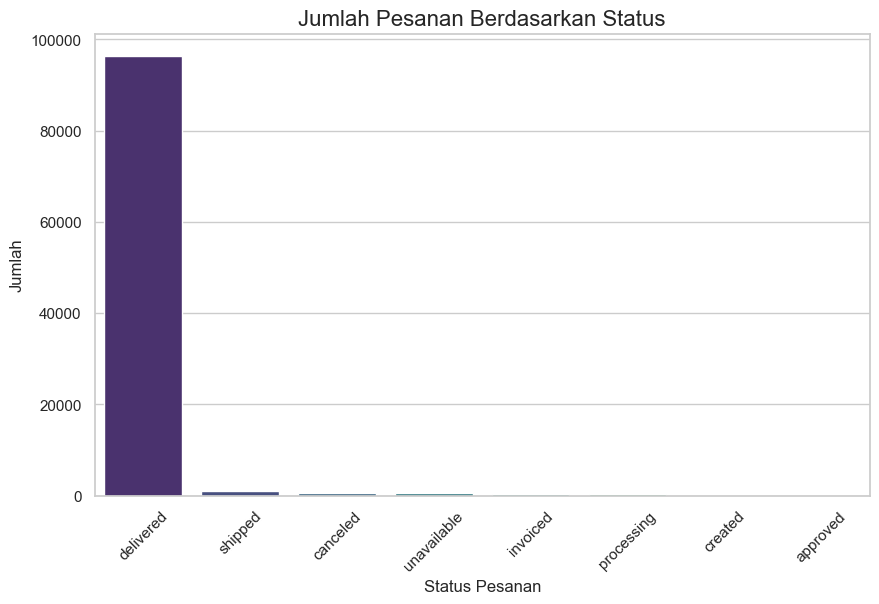

In [6]:
# Menghitung jumlah pesanan untuk setiap status
order_status_counts = orders_df['order_status'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6)) # Mengatur ukuran gambar
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="viridis")

plt.title('Jumlah Pesanan Berdasarkan Status', fontsize=16)
plt.xlabel('Status Pesanan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45) # Memutar label x agar tidak tumpang tindih
plt.show() # Menampilkan plot

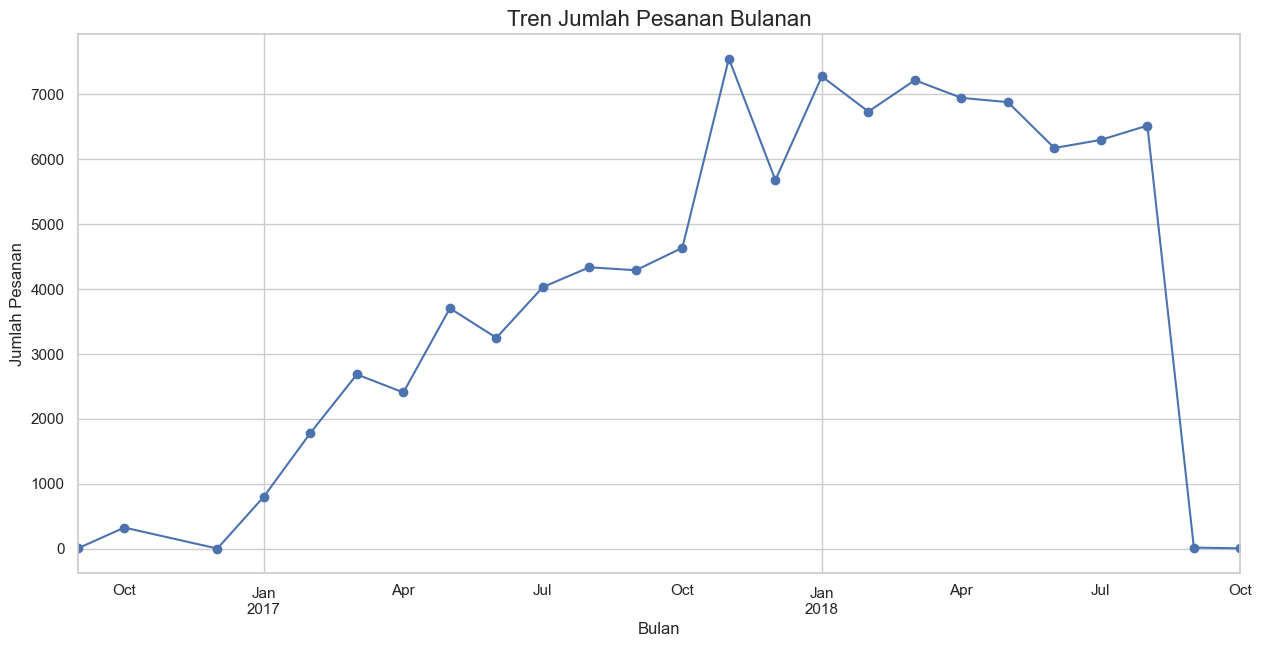

In [9]:
# Kita #menggunakan .copy() agar tidak mengubah DataFrame asli
orders_timestamp_df = orders_df.copy()
orders_timestamp_df['order_purchase_timestamp'] = pd.to_datetime(orders_timestamp_df['order_purchase_timestamp'])

# Membuat kolom baru untuk bulan pembelian
orders_timestamp_df['purchase_month'] = orders_timestamp_df['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah pesanan per bulan
monthly_orders = orders_timestamp_df.groupby('purchase_month')['order_id'].count()

# Membuat line chart
plt.figure(figsize=(15, 7))
monthly_orders.plot(kind='line', marker='o')

plt.title('Tren Jumlah Pesanan Bulanan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.grid(True)
plt.show()

In [10]:
# --- Gabungkan (merge) tabel order_items dengan products ---
# Kita gabungkan berdasarkan 'product_id'
product_sales_df = pd.merge(order_items_df, products_df, on='product_id')

# --- Gabungkan hasil di atas dengan tabel translasi ---
# Kita gabungkan berdasarkan 'product_category_name'
product_sales_df = pd.merge(product_sales_df, translation_df, on='product_category_name')

print("Tabel berhasil digabungkan!")
product_sales_df.head()

Tabel berhasil digabungkan!


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


C:\Users\Besto\AppData\Local\Temp\ipykernel_26628\3562070991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='mako')


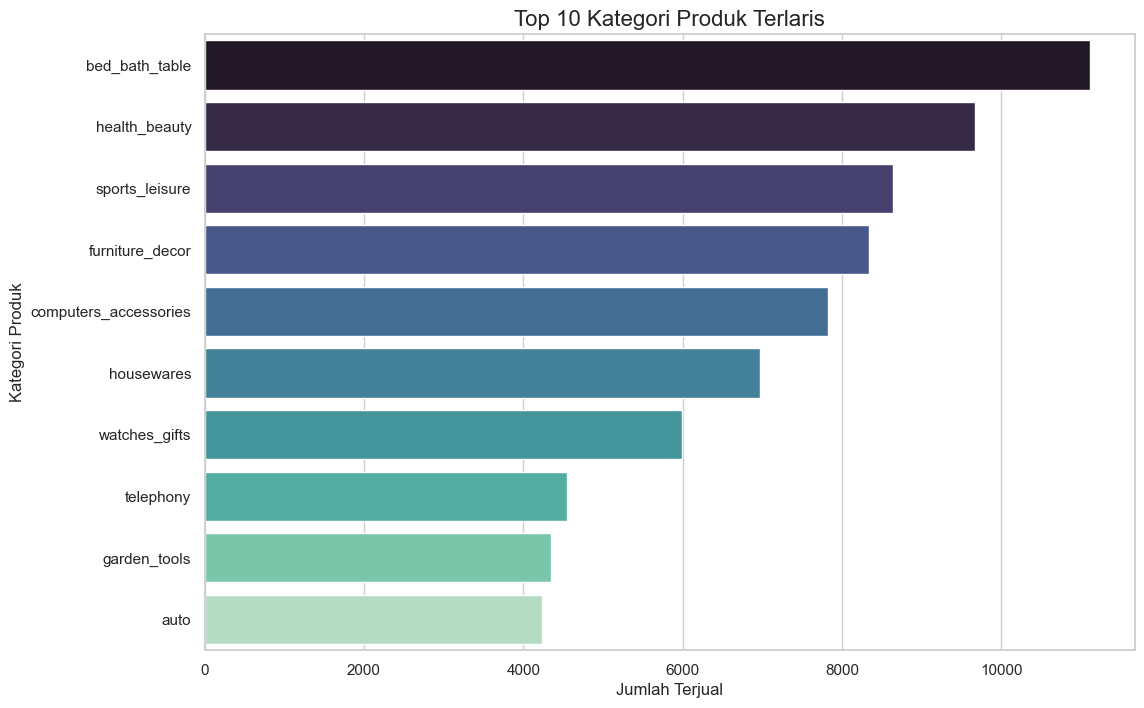

In [11]:
# Menghitung jumlah penjualan per kategori (dalam Bahasa Inggris)
top_10_categories = product_sales_df['product_category_name_english'].value_counts().head(10)

# Membuat bar chart untuk 10 kategori teratas
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='mako')

plt.title('Top 10 Kategori Produk Terlaris', fontsize=16)
plt.xlabel('Jumlah Terjual', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()

C:\Users\Besto\AppData\Local\Temp\ipykernel_26628\456806869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='rocket')


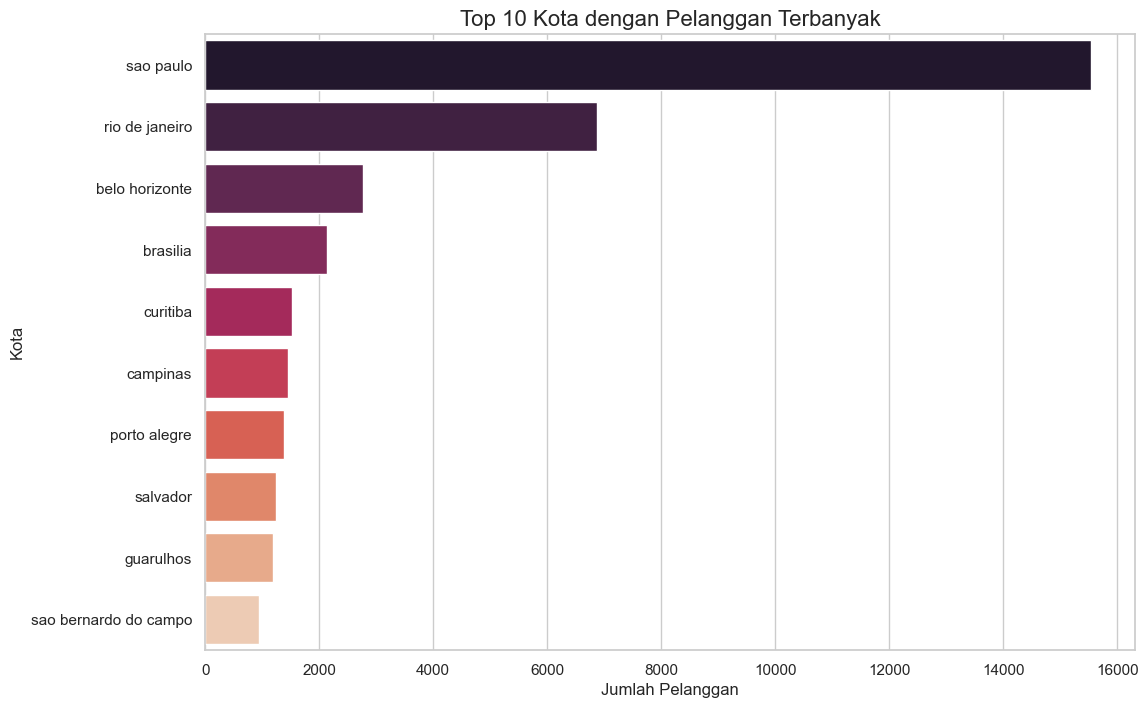

In [12]:
# Menghitung jumlah pelanggan per kota
top_10_cities = customers_df['customer_city'].value_counts().head(10)

# Membuat bar chart untuk 10 kota dengan pelanggan terbanyak
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='rocket')

plt.title('Top 10 Kota dengan Pelanggan Terbanyak', fontsize=16)
plt.xlabel('Jumlah Pelanggan', fontsize=12)
plt.ylabel('Kota', fontsize=12)
plt.show()

C:\Users\Besto\AppData\Local\Temp\ipykernel_26628\1293260339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_score_counts.index, y=review_score_counts.values, palette='plasma')


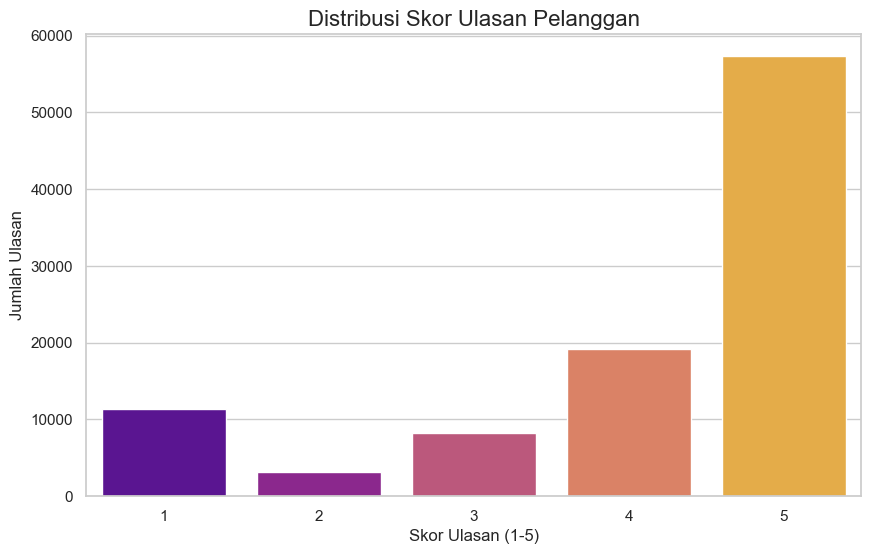

In [13]:
# Menghitung jumlah untuk setiap skor ulasan
review_score_counts = reviews_df['review_score'].value_counts().sort_index()

# Membuat bar chart untuk distribusi skor ulasan
plt.figure(figsize=(10, 6))
sns.barplot(x=review_score_counts.index, y=review_score_counts.values, palette='plasma')

plt.title('Distribusi Skor Ulasan Pelanggan', fontsize=16)
plt.xlabel('Skor Ulasan (1-5)', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()